# Imports

In [1]:
import time
import random
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Digraph

# Set the style of the plots with grey grid
sns.set(style="darkgrid")

# Recursion

## Exercises

### Exercise 1 - Factorial

In [54]:
def factorial(n):
    if not isinstance(n, int): # Check if n is integer
        raise TypeError('n must be a non-negative integer')
    if n < 0: # Check if n is non-negative
        raise ValueError('n must be a non-negative integer')
    if n == 0: # Base case
        return 1
    return n * factorial(n-1) # Recursive case

##### Use

In [55]:
factorial(-1)

ValueError: n must be a non-negative integer

In [56]:
factorial(5.5)

TypeError: n must be a non-negative integer

In [57]:
factorial(0) # 1

1

In [58]:
factorial(1) # 1

1

In [59]:
factorial(2) # 2

2

In [60]:
factorial(3) # 6

6

In [61]:
factorial(5) # 120

120

In [62]:
factorial(20) # 2432902008176640000

2432902008176640000

### Exercise 2 - Fibonacci Sequence

In [8]:
# Fibonacci sequence
def fibonacci(n):
    if not isinstance(n, int): # Check if n is integer
        raise TypeError('n must be a non-negative integer')
    if n < 0: # Check if n is non-negative
        raise ValueError('n must be a non-negative integer')
    if n == 0: # Base case
        return 0
    if n == 1: # Base case
        return 1
    return fibonacci(n-1) + fibonacci(n-2) # Recursive case

##### Use

In [ ]:
fibonacci(-1)

In [ ]:
fibonacci(1.3)

In [ ]:
fibonacci(0) # 0

In [ ]:
fibonacci(1) # 1

In [ ]:
fibonacci(2) # 1

In [ ]:
n = 20

In [ ]:
for i in range(n):
    print(fibonacci(i), end='')
    if i < n-1:
        print(', ', end='')

### Exercise 3 - Sum of list

Write a recursive function in Python that takes a list of numbers as input and returns the sum of the numbers in the list. If the list is empty, the sum should be 0.

In [63]:
def sum_of_list(sequence):
    # Base case: If the list is empty, return 0
    if not sequence:
        return 0
    # Recursive case: The sum is the first element plus the sum of the rest of the list
    else:
        return sequence[0] + sum_of_list(sequence[1:])

##### Use

In [76]:
numbers = [1, 2, 3, 4, 5]
print("The sum of the list is:", sum_of_list(numbers))

The sum of the list is: 15


##### Recursive or Iterative?

In [64]:
def sum_of_list_iterative(sequence):
    total_sum = 0
    for num in sequence:
        total_sum += num
    return total_sum

In [65]:
numbers = [1, 2, 3, 4, 5]
print("The sum of the list is:", sum_of_list_iterative(numbers))

The sum of the list is: 15


In [66]:
def time_function(func, sequence):
    start = time.time()
    func(sequence)
    end = time.time()
    return end - start

def random_list(length):
    return [random.randint(0, 100) for _ in range(length)]

In [67]:
# Generate a random length list and time the recursive sum function for 100 times, save the average time
time_recursive = []
time_iterative = []

for length in range(10, 1000, 10):
    sequence = random_list(length)
    time_recursive.append(time_function(sum_of_list, sequence))
    time_iterative.append(time_function(sum_of_list_iterative, sequence))

In [68]:
# Generate a random length list and time the recursive sum function for 100 times, save the average time
time_recursive = []
time_iterative = []

for length in range(10, 100, 10):
    sequence = random_list(length)
    time_recursive.append(time_function(sum_of_list, sequence))
    time_iterative.append(time_function(sum_of_list_iterative, sequence))

In [69]:
# Transform time in seconds to time in microseconds
time_recursive = [t*1000000 for t in time_recursive]
time_iterative = [t*1000000 for t in time_iterative]

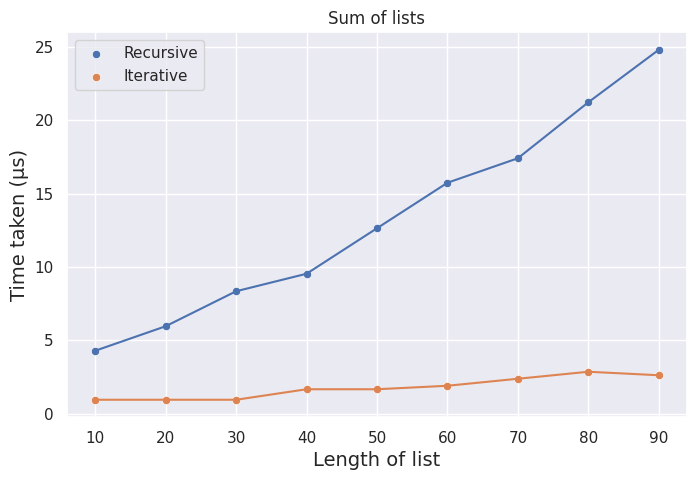

In [70]:
# Plot the time taken for the recursive and iterative functions
plt.figure(figsize=(8, 5))

sns.scatterplot(x=range(10, 100, 10), y=time_recursive, label='Recursive')
sns.scatterplot(x=range(10, 100, 10), y=time_iterative, label='Iterative')
sns.lineplot(x=range(10, 100, 10), y=time_recursive)
sns.lineplot(x=range(10, 100, 10), y=time_iterative)

plt.title('Sum of lists')

plt.xlabel('Length of list', size=14)
plt.ylabel('Time taken (μs)', size=14)

plt.legend()

plt.show()


### Exercise 4 - Revisiting Fibonacci

In [71]:
def fibonacci_iterative(n):
    if not isinstance(n, int): # Check if n is integer
        raise TypeError('n must be a non-negative integer')
    if n < 0: # Check if n is non-negative
        raise ValueError('n must be a non-negative integer')
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a + b
    return a

In [79]:
time_recursive = []
time_iterative = []

for i in range(1, 30, 2):
    time_recursive.append(time_function(fibonacci, i))
    time_iterative.append(time_function(fibonacci_iterative, i))

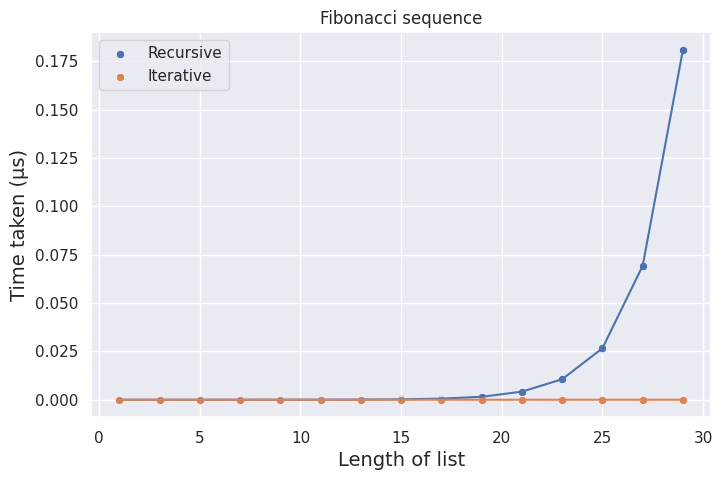

In [80]:
# Plot the time taken for the recursive and iterative functions
plt.figure(figsize=(8, 5))

sns.scatterplot(x=range(1, 30, 2), y=time_recursive, label='Recursive')
sns.scatterplot(x=range(1, 30, 2), y=time_iterative, label='Iterative')
sns.lineplot(x=range(1, 30, 2), y=time_recursive)
sns.lineplot(x=range(1, 30, 2), y=time_iterative)

plt.title('Fibonacci sequence')

plt.xlabel('Length of list', size=14)
plt.ylabel('Time taken (μs)', size=14)

plt.legend()

plt.show()

In [81]:
# Fibonacci sequence
def fibonacci_optimized(n):
    if not isinstance(n, int): # Check if n is integer
        raise TypeError('n must be a non-negative integer')
    if n < 0: # Check if n is non-negative
        raise ValueError('n must be a non-negative integer')
    if n == 0:
        return 1, 0
    a, b = fibonacci_optimized(n-1)
    return a + b, a


In [82]:
n = 20
for i in range(n):
    print(fibonacci(i), end='')
    if i < n-1:
        print(', ', end='')


0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181

In [83]:
n = 20
for i in range(n):
    print(fibonacci_optimized(i)[1], end='')
    if i < n-1:
        print(', ', end='')


0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181

In [84]:
time_recursive = []
time_iterative = []
time_optimized = [] 

for i in range(1, 30, 2):
    time_recursive.append(time_function(fibonacci, i))
    time_iterative.append(time_function(fibonacci_iterative, i))
    time_optimized.append(time_function(fibonacci_optimized, i))

# Transform time in seconds to time in microseconds
time_recursive = [t*1000000 for t in time_recursive]
time_iterative = [t*1000000 for t in time_iterative]
time_optimized = [t*1000000 for t in time_optimized]

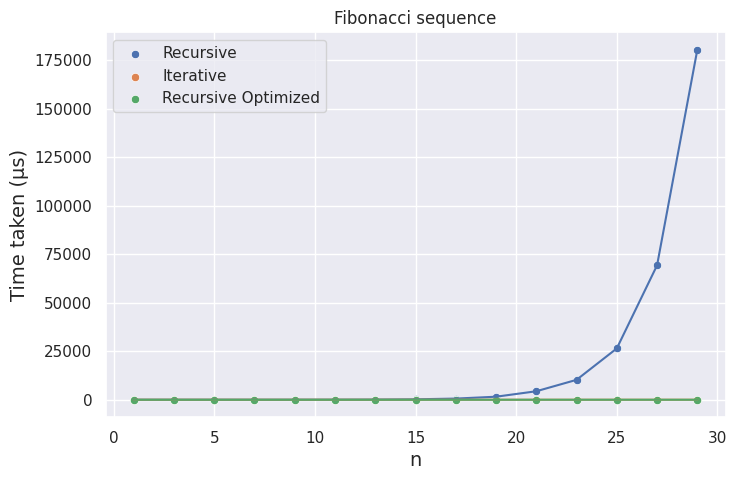

In [85]:
# Plot the time taken for the recursive and iterative functions
plt.figure(figsize=(8, 5))

sns.scatterplot(x=range(1, 30, 2), y=time_recursive, label='Recursive')
sns.scatterplot(x=range(1, 30, 2), y=time_iterative, label='Iterative')
sns.scatterplot(x=range(1, 30, 2), y=time_optimized, label='Recursive Optimized')
sns.lineplot(x=range(1, 30, 2), y=time_recursive)
sns.lineplot(x=range(1, 30, 2), y=time_iterative)
sns.lineplot(x=range(1, 30, 2), y=time_optimized)

plt.title('Fibonacci sequence')

plt.xlabel('n', size=14)
plt.ylabel('Time taken (μs)', size=14)

plt.legend()

plt.show()

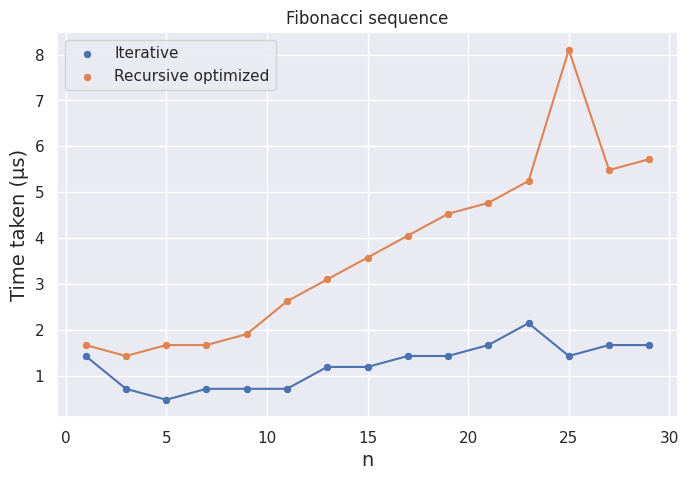

In [86]:
# Plot the time taken for the recursive and iterative functions
plt.figure(figsize=(8, 5))

sns.scatterplot(x=range(1, 30, 2), y=time_iterative, label='Iterative')
sns.scatterplot(x=range(1, 30, 2), y=time_optimized, label='Recursive optimized')
sns.lineplot(x=range(1, 30, 2), y=time_iterative)
sns.lineplot(x=range(1, 30, 2), y=time_optimized)

plt.title('Fibonacci sequence')

plt.xlabel('n', size=14)
plt.ylabel('Time taken (μs)', size=14)

plt.legend()

plt.show()

### Exercise 5 - Binary Search

##### Recursive

In [87]:
def binary_search_recursive(arr, target, low, high):
    if high >= low:
        mid = (high + low) // 2
        
        # If element is present at the middle itself
        if arr[mid] == target:
            return mid
        
        # If element is smaller than mid, then it can only be present in left subarray
        elif arr[mid] > target:
            return binary_search_recursive(arr, target, low, mid - 1)
        
        # Else the element can only be present in right subarray
        else:
            return binary_search_recursive(arr, target, mid + 1, high)
    else:
        # Element is not present in array
        return -1

In [155]:
# Example usage
arr = [2, 3, 4, 10, 40]
target = 10
result = binary_search_recursive(arr, target, 0, len(arr)-1)
if result != -1:
    print("Element found at index:", result)
else:
    print("Element not found in array")

Element found at index: 3


In [156]:
# Example usage
arr = [2, 3, 4, 10, 40]
target = 30
result = binary_search_recursive(arr, target, 0, len(arr)-1)
if result != -1:
    print("Element found at index:", result)
else:
    print("Element not found in array")

Element not found in array


##### Iterative

In [89]:
def binary_search_iterative(arr, target):
    low = 0
    high = len(arr) - 1
    
    while low <= high:
        mid = (low + high) // 2
        
        # Check if target is present at mid
        if arr[mid] == target:
            return mid
        
        # If target is greater, ignore left half
        elif arr[mid] < target:
            low = mid + 1
        
        # If target is smaller, ignore right half
        else:
            high = mid - 1
    
    # If we reach here, the element was not present
    return -1

In [157]:
# Example usage
arr = [2, 3, 4, 10, 40]
target = 10
result = binary_search_iterative(arr, target)
if result != -1:
    print("Element found at index:", result)
else:
    print("Element not found in array")

Element found at index: 3


##### Comparison

In [144]:
# Compare the time taken for the recursive and iterative binary search
time_recursive = []
time_iterative = []

# Average over 100 runs
for length in range(100, 5000, 100):
    for _ in range(100):
        time_recursive_sum = 0
        time_iterative_sum = 0
        sequence = random_list(length)
        sequence.sort()
        #target = random.choice(sequence)
        target = random.randint(0, 100) # Take target as a random number between 0 and 100 
        start = time.time()
        binary_search_recursive(sequence, target, 0, len(sequence)-1)
        end = time.time()
        time_recursive_sum += (end - start) * 1000000

        start = time.time()
        binary_search_iterative(sequence, target)
        end = time.time()
        time_iterative_sum += (end - start) * 1000000
    
    time_recursive.append(time_recursive_sum / 100)
    time_iterative.append(time_iterative_sum / 100)

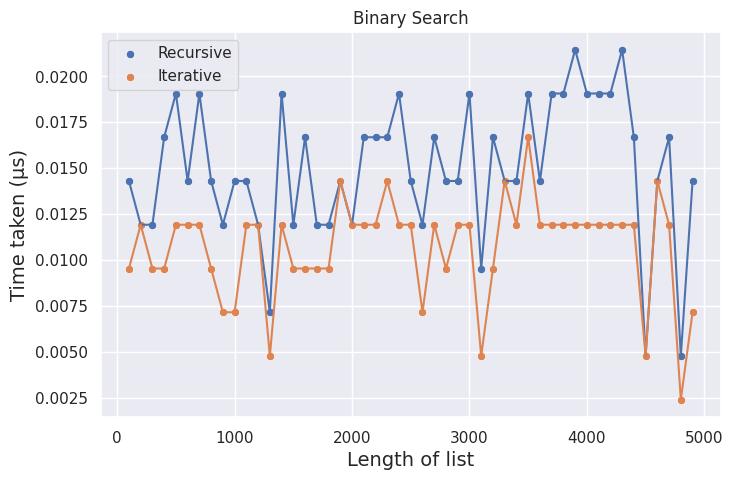

In [145]:
# Plot the time taken for the recursive and iterative functions
plt.figure(figsize=(8, 5))

sns.scatterplot(x=range(100, 5000, 100), y=time_recursive, label='Recursive')
sns.scatterplot(x=range(100, 5000, 100), y=time_iterative, label='Iterative')
sns.lineplot(x=range(100, 5000, 100), y=time_recursive)
sns.lineplot(x=range(100, 5000, 100), y=time_iterative)

plt.title('Binary Search')

plt.xlabel('Length of list', size=14)
plt.ylabel('Time taken (μs)', size=14)

plt.legend()

plt.show()

In [151]:
def moving_average(data, window_size):
    moving_average = []
    for i in range(window_size, len(data)):
        moving_average.append(sum(data[i-window_size:i]) / window_size)
    return moving_average

In [ ]:
window_size = 10
moving_average_recursive = moving_average(time_recursive, window_size)
moving_average_iterative = moving_average(time_iterative, window_size)
x_range = range(100, 5000, 100)
x_range_mov_avg = moving_average(x_range, window_size)

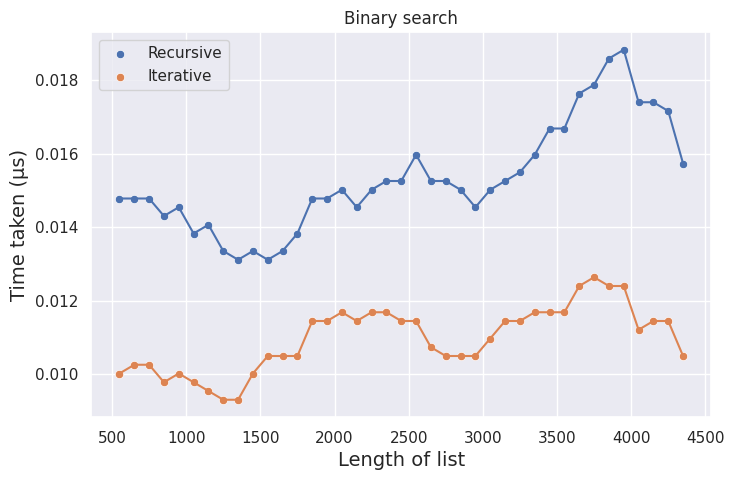

In [154]:
# Plot the time taken for the recursive and iterative functions moving average
plt.figure(figsize=(8, 5))

sns.scatterplot(x=x_range_mov_avg, y=moving_average_recursive, label='Recursive')
sns.scatterplot(x=x_range_mov_avg, y=moving_average_iterative, label='Iterative')
sns.lineplot(x=x_range_mov_avg, y=moving_average_recursive)
sns.lineplot(x=x_range_mov_avg, y=moving_average_iterative)

plt.title('Binary search')

plt.xlabel('Length of list', size=14)
plt.ylabel('Time taken (μs)', size=14)

plt.legend()

plt.show()

### Exercise 6 - Binary Search Tree

##### Define the Class

Recursion is an easy and natural way of building a tree

In [2]:
class Node:
    def __init__(self, data):
        self.left = None # Left child
        self.right = None # Right child
        self.data = data # Node value

    def insert(self, data):
        if self.data:
            if data < self.data:
                if self.left is None:
                    self.left = Node(data)
                else:
                    self.left.insert(data) # Recursive call
            elif data > self.data:
                if self.right is None:
                    self.right = Node(data)
                else:
                    self.right.insert(data) # Recursive call
        else:
            self.data = data

    def find(self, value):
        if value < self.data:
            if self.left is None:
                return str(value) + " Not Found"
            return self.left.find(value) # Recursive call
        elif value > self.data:
            if self.right is None:
                return str(value) + " Not Found"
            return self.right.find(value) # Recursive call
        else:
            return str(self.data) + ' is found'

##### Additional Functions

In [3]:
def tree_depth(root):
    if root is None:
        return 0
    else:
        left_depth = tree_depth(root.left) # Recursive call
        right_depth = tree_depth(root.right) # Recursive call
        return max(left_depth, right_depth) + 1

In [4]:
def visualize_tree(node):
    def add_nodes_edges(node, dot=None):
        if dot is None:
            dot = Digraph()
            dot.node(name=str(node), label=str(node.data))
        
        if node.left:
            dot.node(name=str(node.left), label=str(node.left.data))
            dot.edge(str(node), str(node.left))
            add_nodes_edges(node.left, dot=dot)
        
        if node.right:
            dot.node(name=str(node.right), label=str(node.right.data))
            dot.edge(str(node), str(node.right))
            add_nodes_edges(node.right, dot=dot)
        
        return dot
    
    dot = add_nodes_edges(node)
    # Display the graph within the Jupyter notebook
    display(dot)

# Build a tree from a list
def build_tree(arr):
    root = Node(arr[0])
    for i in range(1, len(arr)):
        root.insert(arr[i])
    return root

##### Use

In [5]:
# Example usage
arr = [3, 5, 2, 7, 1, 4, 6]
root = build_tree(arr)

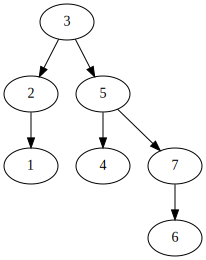

In [6]:
visualize_tree(root)

In [7]:
tree_depth(root)

4